# Object based simulation - target proportion

This notebook replicates the notebook `object_based_sim01` but with a variable disk radius and a criterion that stops the creation of objects once the target proportion is reached. See that notebook for more details.

Import the required modules

In [1]:
import numpy as np
import matplotlib.pylab as pl

Define the grid and the number of objects. Here the number of objects is only used as upper limit and it is set to a quite big number, to avoid infinite loops. The main criteria used to stop the simulation of objects is the target proportions of facies code `1` (for example, "sand").

In [2]:
# Target proportion of facies  1
target1 = 0.20 # 20%

# Number of objects
nb_obj = 100

# Grid definition
nx = 300
ny = 200
ox = 0.0
oy = 0.0
dx = 1.0
dy = 1.0
# Coordinates of the grid nodes
x, y = np.meshgrid(np.arange(oy,ny*dy,dy), np.arange(ox,nx*dx,dx))

Define the canvas to store the results of the simulation.

In [3]:
sim = np.zeros((nx, ny))

Randomly place the centers of the disks and the value of the radius

In [4]:
np.random.seed(45137)
x_obj = np.random.uniform(x.min(), x.max(), nb_obj)
y_obj = np.random.uniform(y.min(), y.max(), nb_obj)
r = np.random.normal(10, 2, nb_obj)

## Simulation

Here, at each iteration step we compute the proportion of facies code `1`, and we check if it is bigger than the target proportions.

In [11]:
for i in range(nb_obj):
    # Step 1 (compute distance from the disk center)
    dist = np.hypot(x-x_obj[i],y-y_obj[i])
    # Step 2 (check where distance < disk radius)
    # NOTE: now `r` is an array too
    mask = np.where(dist < r[i])
    # Step 3 (set the grid points inside the disk = 1)
    sim[mask] = 1
    # Compute the proportion of facies 1
    # (as we are dealing with a binary matrix, we could also use the following commented syntax.
    # prop1 = (np.sum(sim)/sim.size)
    prop1 = (np.sum(sim==1)/sim.size)
    
    print("Proportion of facies 1: {0:.2f} (step {1:3d})".format(prop1, i))
    if prop1 > target1:
        print("STOP, target proportion reached")
        break

Proportion of facies 1: 0.21 (step   0)
STOP, target proportion reached


## Plot

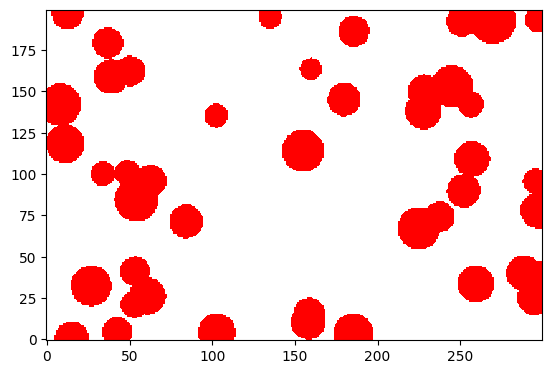

In [10]:
# "pimpa" color map
cmap = pl.cm.colors.ListedColormap(['white', 'red'])
pl.imshow(sim.T, origin="lower", cmap=cmap)
pl.show()